<style>
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
    }
</style>

## Introduction

The objectives of this notebook are:  
1. Understanding data manipulation in Pandas.
2. Learning the internal working of matplotlib library.
3. Understanding Standard Deviation, Variance through examples.
4. Visualizing all statistical features like Z-scores etc.
5. Feature transformation:
       a. Standardization
       b. Normalization
       c. Log Transformations

### Some questions to be answered:
1. How does the data change when scaled?
2. The effect of different kinds of scaling techniques.
3. Correlation Analysis
4. Understand standard deviation- what makes a std "high" or "low" using ***Coefficient of Variation***.
   - Coeff of variation is the ratio of std to mean. (std as % of mean.)
   - If coeff is high, it means that std is high for that feature. is coeff is low, means std is low for that feature.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import palmerpenguins as pp
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display, HTML, display_html
##to see the package details
#!pip show palmerpenguins

In [2]:
#shapiro-wilk test to check gaussian distribution
from scipy.stats import shapiro

In [3]:
#set the display format of float numbers 
#used to override the scientific notation.
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
#checking what all present in palmerpenguins library.
dir(pp)

In [4]:
#load the dataset
penguin_data = pp.load_penguins()

In [5]:
penguin_data.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.100,18.700,181.000,3750.000,male,2007
1,Adelie,Torgersen,39.500,17.400,186.000,3800.000,female,2007
2,Adelie,Torgersen,40.300,18.000,195.000,3250.000,female,2007


In [6]:
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [7]:
#check for duplicate rows--None
penguin_data.duplicated().sum()

np.int64(0)

In [8]:
#check number of missing values in each column
penguin_data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [9]:
#see all rows where at least 1 missing value present.
penguin_data[penguin_data.isnull().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.100,18.100,193.000,3475.000,NaN,2007
9,Adelie,Torgersen,42.000,20.200,190.000,4250.000,NaN,2007
10,Adelie,Torgersen,37.800,17.100,186.000,3300.000,NaN,2007
11,Adelie,Torgersen,37.800,17.300,180.000,3700.000,NaN,2007
47,Adelie,Dream,37.500,18.900,179.000,2975.000,NaN,2007
178,Gentoo,Biscoe,44.500,14.300,216.000,4100.000,NaN,2007
218,Gentoo,Biscoe,46.200,14.400,214.000,4650.000,NaN,2008
256,Gentoo,Biscoe,47.300,13.800,216.000,4725.000,NaN,2009
268,Gentoo,Biscoe,44.500,15.700,217.000,4875.000,NaN,2009


In [10]:
#drop all NA values
penguin_data.dropna(inplace = True)

In [11]:
#make a copy of dataframe for further manipulation
data2 = penguin_data.copy()

### Distribution of discrete data

In [12]:
#check for all unique values in 'species', 'island', 'sex' and 'year'
categorical_columns = data2.select_dtypes(exclude = "float").columns.tolist()
categorical_columns

['species', 'island', 'sex', 'year']

In [13]:
#View all unique values in these columns
for i in categorical_columns:
    unique_categories = data2[i].unique()
    print(i, ": ", unique_categories)

species :  ['Adelie' 'Gentoo' 'Chinstrap']
island :  ['Torgersen' 'Biscoe' 'Dream']
sex :  ['male' 'female']
year :  [2007 2008 2009]


#### Relative frequecies of categories within each feature

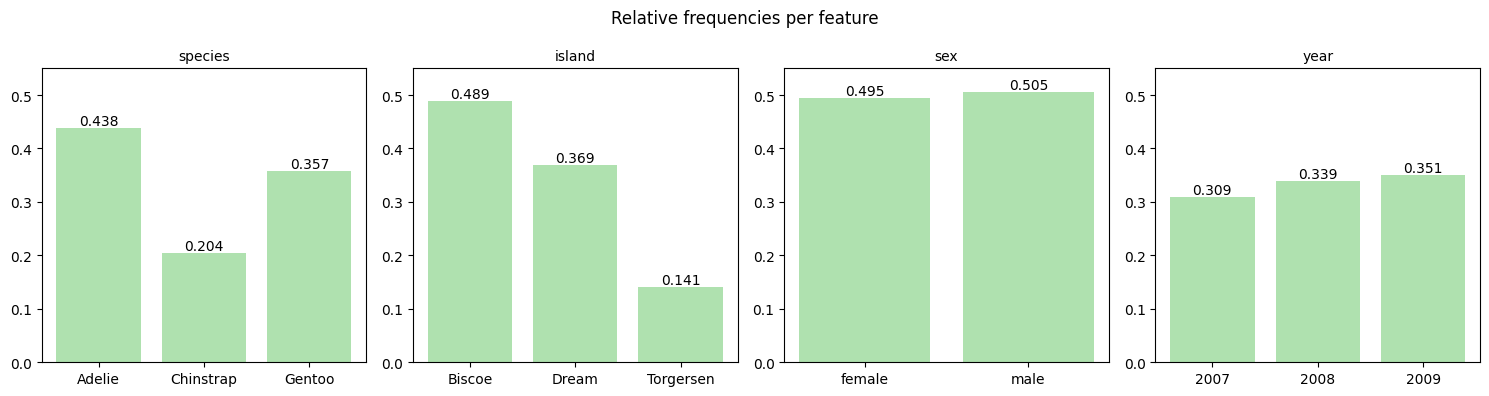

In [16]:
#define the layout with 1 row and 3 columns
fig, axes = plt.subplots(1, 4, figsize = (15, 4))

#run loop to create each subplot
for i,colname in enumerate(categorical_columns):
    #get the total count (as proportion) of each category from the feature.
    freq = data2[colname].value_counts(normalize = True).sort_index()
    #freq.values rounded off for shorter bar-labels.
    freq = freq.round(3)
    p = axes[i].bar(freq.index.astype(str), freq.values, color = "#AFE1AF", label = freq.values)
    axes[i].set_title("{0}".format(colname), fontsize = 10)
    axes[i].set_ylim(0,0.55)
    axes[i].bar_label(p)
fig.suptitle('Relative frequencies per feature', fontsize = 12)
#prevents overlap of titles and labels
plt.tight_layout()
plt.show()

#### Observations:
1. The proportion of Chinstrap penguins is very low (~20% of dataset) as compared to others.
2. Species from Torgersen island account for only 14% of the data.
3. Gender and year-wise penguins proportion is almost equal.

### Species per Island (Absolute & Relative count)

#### a. Total number of each species on each island

In [56]:
#relative frequencies of each species.
# Group by island and species, then count
species_count = data2.groupby(['island', 'species']).size().unstack(fill_value=0)
species_count

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,119
Dream,55,68,0
Torgersen,47,0,0


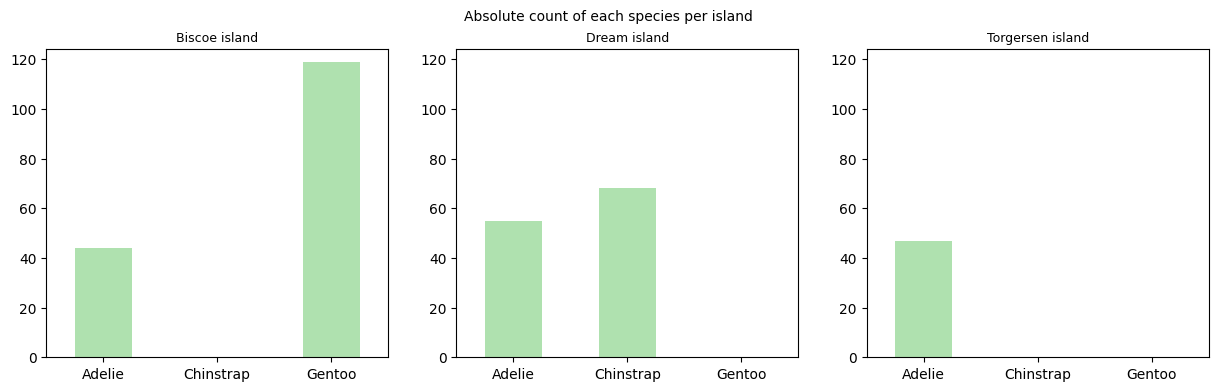

In [57]:
#Plot for total number of each species per island
fig, axes = plt.subplots(1, 3, figsize = (15,4))

for i, island in enumerate(species_count.index):
    species_count.loc[island].plot(kind='bar', ax=axes[i], color="#AFE1AF")
    axes[i].set_title("{0} island".format(island), fontsize = 9)
    axes[i].set_ylim(0, species_count.max().max() + 5)
    axes[i].set_xlabel('')
    axes[i].set_xticklabels(species_count.columns, rotation=0)
    #axes[i].table(cellText = species_count.loc[island])

fig.suptitle('Absolute count of each species per island', fontsize = 10)
plt.show()

#### b. % of each species on each island

In [18]:
#find the total number of adelie, chinstrap and gentoo penguins.
#then divide the count of each by their total to find % of Adelie, % of Chinstrap & % of Gentoo on each island.
# Normalize the counts to get relative frequencies
#% of each penguin (out of their total count) on each island
species_rel_freq = species_count.div(species_count.sum(axis=0), axis=1)
species_rel_freq

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,0.301,0.000,1.000
Dream,0.377,1.000,0.000
Torgersen,0.322,0.000,0.000


In [66]:
species_rel_freq.loc['Biscoe'].values.round(2)

array([0.3, 0. , 1. ])

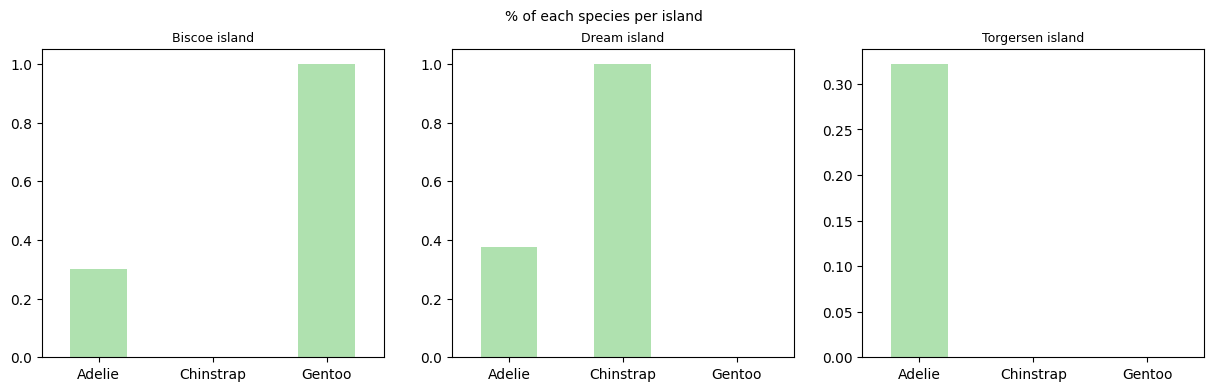

In [69]:
#Plot for total number of each species per island
fig, axes = plt.subplots(1, 3, figsize = (15,4))

for i, island in enumerate(species_count.index):
    species_rel_freq.loc[island].plot(kind='bar', ax=axes[i], color="#AFE1AF")
    axes[i].set_title("{0} island".format(island), fontsize = 9)
    #axes[i].set_ylim(0, 1)
    axes[i].set_xlabel('')
    axes[i].set_xticklabels(species_rel_freq.columns, rotation=0)
    #axes[i].table(cellText = species_rel_freq.loc[island])

fig.suptitle('% of each species per island', fontsize = 10)
plt.show()

- From the table above, we can see that Adelie penguins are found in approximately similar proportion across all 3 islands.
- Chinstrap are present only on Dream island.
- Gentoo are present only on Biscoe island.

#### Observations:
1. From the first chart (earlier), we saw that Gentoo penguins account for ~35.7% of the dataset. From this chart, we can see that Gentoo penguins are present only on Biscoe island.
2. Chinstrap penguins account for ~20.4% of dataset & are only present on Dream island.

### Distribution of continuous data

In [70]:
#Statistical summary of numeric columns
data2.drop(columns = ['year']).describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000,333.000,333.000,333.000
mean,43.993,17.165,200.967,4207.057
std,5.469,1.969,14.016,805.216
min,32.100,13.100,172.000,2700.000
25%,39.500,15.600,190.000,3550.000
50%,44.500,17.300,197.000,4050.000
75%,48.600,18.700,213.000,4775.000
max,59.600,21.500,231.000,6300.000


### Initial Observations:
1. Bill length- Mean (43.9) is lower than median (44.5) suggesting a mild left-skewness.
2. Bill depth- Mean (17.16)  and median (17.3) have a very low difference, suggesting approx normality.
3. Flipper length- Mean (200.9) is greater than median (197) suggesting mild right-skewness.
4. Body mass- Mean (4207) is much greater than median (4050) suggesting moderate right-skewness.

Skewness can also be better understood using standard deviation.  
Below, I've calculated the **coeff. of variation** which helps us understand how "high" or "low" a standard deviation is with respect to given feature's mean.

In [71]:
#Create lists that will store stats of each feature.
feature_means = []
feature_medians = []
feature_std = []
feature_cv = []

In [72]:
#continuous feature list
continuous_features = data2.select_dtypes(include = "float64").columns.tolist()
continuous_features

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [73]:
for i in continuous_features:
    f_mean = round(data2[i].mean(),3)
    f_median = round(data2[i].median(),3)
    f_std = round(data2[i].std(), 3)
    f_cv = round(f_std/f_mean,3)
    feature_means.append(f_mean)
    feature_medians.append(f_median)
    feature_std.append(f_std)
    feature_cv.append(f_cv)

In [74]:
#Create dataframe of all these summary stats
summary_stats = pd.DataFrame({   'feature': ['bill_length', 'bill_depth', 'flipper_length', 'body_mass'],
                                 'mean': feature_means,
                                 'median': feature_medians,
                                 'std': feature_std,
                                 'coeff_of_var': feature_cv})

In [75]:
summary_stats

,feature,mean,median,std,coeff_of_var
0,bill_length,43.993,44.500,5.469,0.124
1,bill_depth,17.165,17.300,1.969,0.115
2,flipper_length,200.967,197.000,14.016,0.070
3,body_mass,4207.057,4050.000,805.216,0.191


### Understanding the relative variability of all features.  

- By simply looking at the standard deviation of features, it is difficult to assess which features are "highly" variable and which features have "low" variability.
- What gives a sense of a stat being "high" or "low" when range or scale of features are different?
- To get a better sense of variability across different features, "coefficient of variation" can be used.
- It is the ratio of standard deviation and mean. It explains standard dev. in terms of mean.
- If standard dev is closer to mean, it implies high variability. If std is low, it implies low variability.

<hr>

- From the table above:
          - Flipper length- SD is 7% of mean implying data points to be clustered around the mean.
          - Bill length- SD is 12.4% of mean implying moderate variability.
          - Bill depth- SD is 11.5% of mean, variability again seems moderate.
          - Body mass- SD is 19.1% of mean indicating moderate variability.

<hr>

Through this parameter, we can get a sense of variability in data points across all features irrespective of their range and units.  
A visual inspection provides even more clarity.

#### Plot distribution of each feature

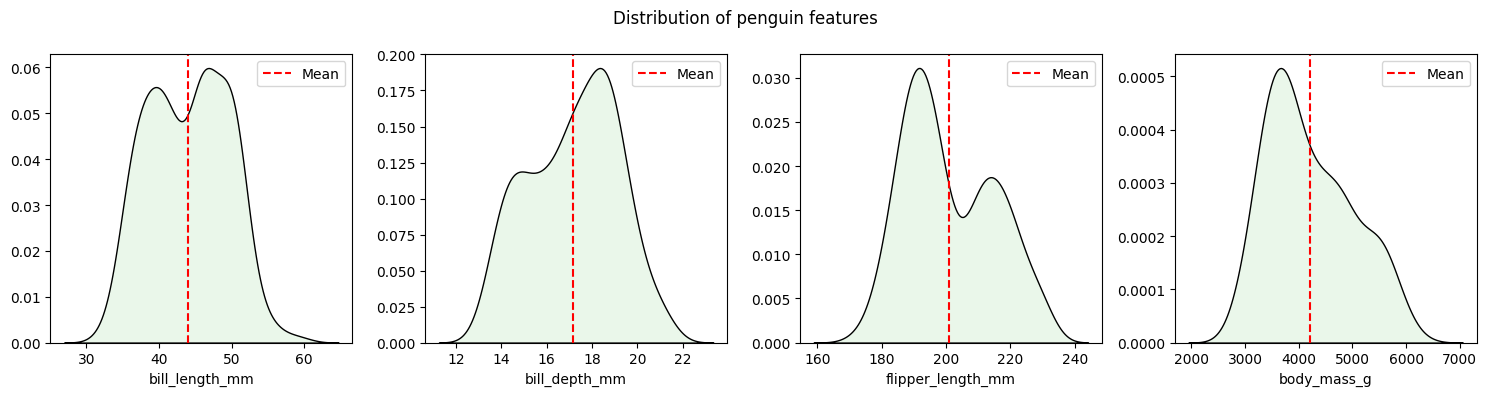

In [78]:
fig, axes = plt.subplots(1, 4, figsize = (15,4))

for index, feature in enumerate(continuous_features):
    sns.kdeplot(data2[feature], ax=axes[index], fill = True, color = '#AFE1AF', edgecolor = 'black')
    axes[index].set_ylabel('')
    #calculate mean of the feature
    mean_value = data2[feature].mean()
    #add vertical dashed line for mean
    axes[index].axvline(mean_value, color = 'red', linestyle = '--', label = 'Mean')
    #add legend for the mean-line
    axes[index].legend()

fig.suptitle('Distribution of penguin features', fontsize = 12)
plt.tight_layout()
plt.show()

#### Box Plots to Check for outliers


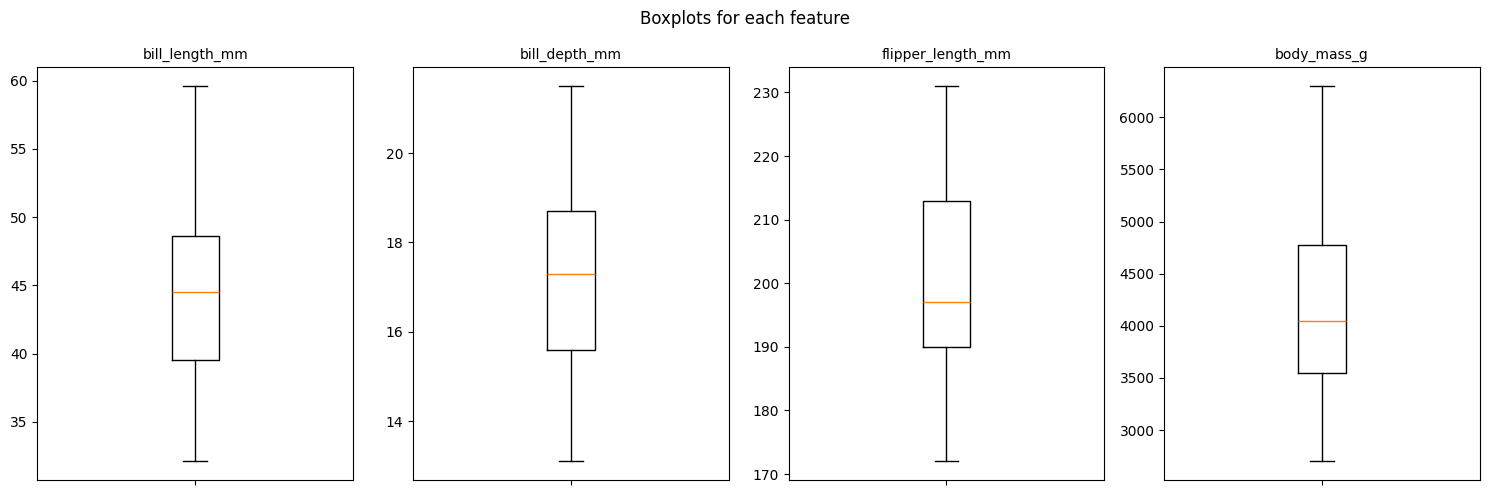

In [79]:
fig, axes = plt.subplots(1,4, figsize = (15,5))

for i, feature in enumerate(continuous_features):
    axes[i].boxplot(data2[feature])
    axes[i].set_title("{0}".format(feature), fontsize = 10)
    axes[i].set_xticklabels('')

fig.suptitle('Boxplots for each feature', fontsize = 12)
plt.tight_layout()
plt.show()

### Does Standardization impact data-distribution?

In [81]:
#make a copy of dataframe 
data_copy1 = data2.copy()

In [82]:
#create an instance of z-norm class
stdscaler = StandardScaler()

In [83]:
#perform Z-score normalization (standardization)
data_copy1[continuous_features] = stdscaler.fit_transform(data_copy1[continuous_features])

In [84]:
#summary stats of standardized features
data_copy1[continuous_features].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000,333.000,333.000,333.000
mean,-0.000,-0.000,0.000,-0.000
std,1.002,1.002,1.002,1.002
min,-2.178,-2.067,-2.070,-1.874
25%,-0.823,-0.796,-0.784,-0.817
50%,0.093,0.069,-0.283,-0.195
75%,0.844,0.781,0.860,0.706
max,2.858,2.205,2.146,2.603


- Mean of the all the features is 0 & standard deviation is ~1.
- All the features are in similar scale range now.

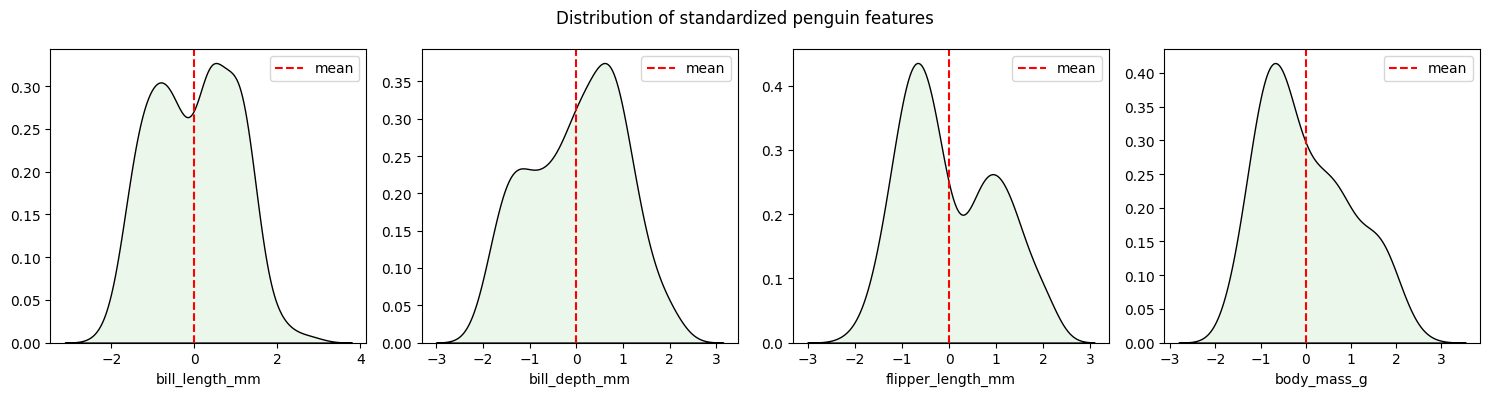

In [88]:
# Distribution plot for  standardized data
fig, axes = plt.subplots(1, 4, figsize = (15,4))

for index, feature in enumerate(continuous_features):
    sns.kdeplot(data_copy1[feature], ax=axes[index], fill = True, color = '#AFE1AF', edgecolor = 'black')
    axes[index].set_ylabel('')
    mean_value = data_copy1[feature].mean()
    #line for mean
    axes[index].axvline(mean_value, color = 'red', linestyle = '--', label = 'mean')
    axes[index].legend()

fig.suptitle('Distribution of standardized penguin features', fontsize = 12)
plt.tight_layout()
plt.show()

### Does Normalization impact data-distribution?

In [89]:
#make a copy of dataframe
data_copy2 = data2.copy()

In [90]:
#create an instance
norm_scaler = MinMaxScaler()

In [92]:
#Normalize
data_copy2[continuous_features] = norm_scaler.fit_transform(data_copy2[continuous_features])

In [93]:
data_copy2[continuous_features].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000,333.000,333.000,333.000
mean,0.432,0.484,0.491,0.419
std,0.199,0.234,0.238,0.224
min,0.000,0.000,0.000,0.000
25%,0.269,0.298,0.305,0.236
50%,0.451,0.500,0.424,0.375
75%,0.600,0.667,0.695,0.576
max,1.000,1.000,1.000,1.000


After min-max normalization, all the features range from 0 to 1.

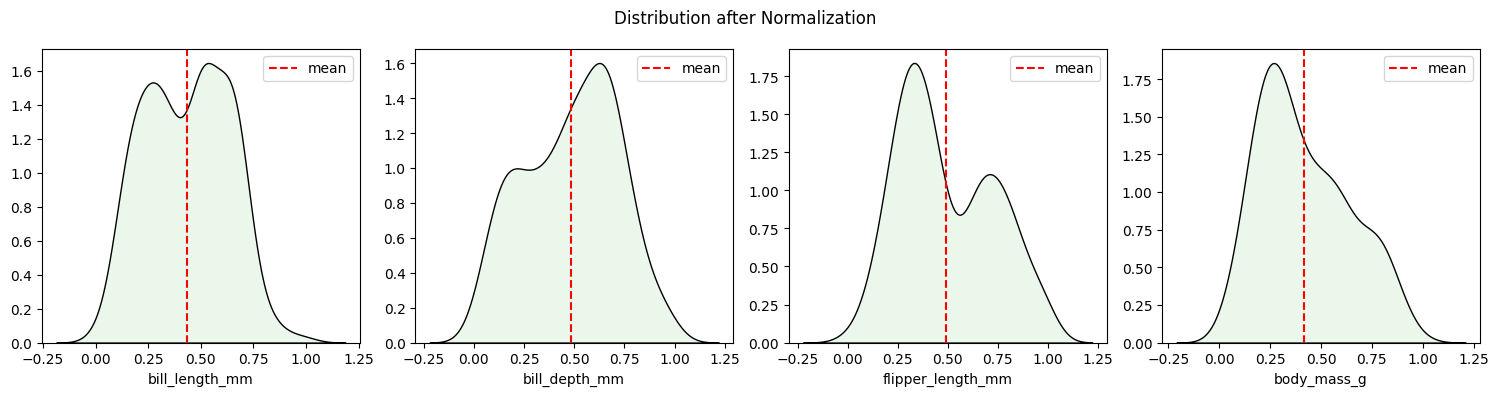

In [97]:
#Plot distribution
fig, axes = plt.subplots(1, 4, figsize = (15,4))
for i, feature in enumerate(continuous_features):
    sns.kdeplot(data_copy2[feature], ax=axes[i], fill = True, color = "#AFE1AF", edgecolor = "black")
    axes[i].set_ylabel('')
    mean_value = data_copy2[feature].mean()
    #add a mean line
    axes[i].axvline(mean_value, color = 'red', linestyle = '--', label = 'mean')
    #add a legend
    axes[i].legend()

fig.suptitle('Distribution after Normalization')
plt.tight_layout()
plt.show()

- As we can see from above, standardization or normalization does not alter the data-distribution (or convert it to normal form)!
- It simply scales the features to speed up convergence in gradient-based algorithms like linear/logistic regression, NNs etc.


### Relationship between all features

In [100]:
print(data2.columns.tolist())

['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']


#### 1. Flipper-length

- Each plot contains 1 feature mapped against body-mass of the penguins.
- Each subplot shows grouping based on gender, island and species.

In [129]:
grouping_vars = ['sex', 'species', 'island']
independent_vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']

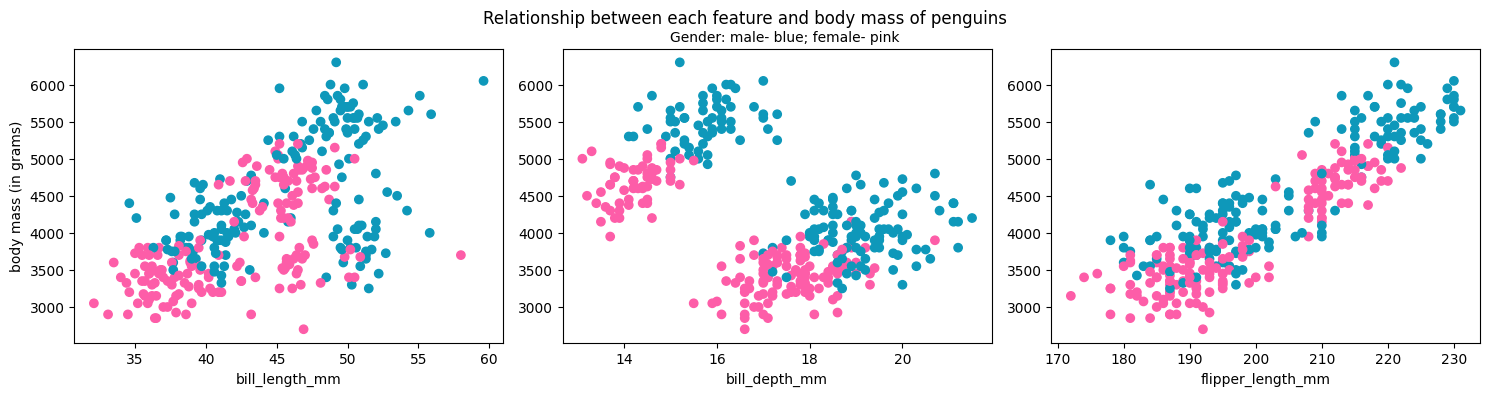

In [136]:
fig, axes = plt.subplots(1, 3, figsize = (15, 4))

for i, feature in enumerate(independent_vars):
    axes[i].scatter(x = data2[feature], y = data2.body_mass_g, 
                    c=data2.sex.map({'male':'#0E98BA', 'female': '#FD5DA8'}))
    axes[i].set_xlabel(feature)

axes[0].set_ylabel('body mass (in grams)')
fig.suptitle('Relationship between each feature and body mass of penguins')
fig.text(x=0.45, y=0.9, s='Gender: male- blue; female- pink')
plt.tight_layout()
plt.show()